# Analysis of the items in Animal Crossing: New Horizons
This shows an analysis of the cost of various items from the Nintendo Switch game Animal Crossing: New Horizons. Additionally, I use the user reviews data for sentiment analysis, creating several forms of data visualisation including word clouds and user rating pie charts. 
This analysis is based on data from https://www.kaggle.com/jessemostipak/animal-crossing.

In [15]:
import pandas as pd # For linear algebra 
import numpy as np # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Data Visulation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [16]:
item_data = pd.read_csv('items.csv', delimiter = ',')
item_data

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
0,12,3d-glasses,3D Glasses,Accessories,NaN,122.0,bells,490.0,bells,NaN,NaN,NaN,NaN,nh,item-3d-glasses,https://villagerdb.com/images/items/full/3d-gl...
1,14,a-tee,A Tee,Tops,NaN,140.0,bells,560.0,bells,NaN,NaN,NaN,NaN,nh,item-a-tee,https://villagerdb.com/images/items/full/a-tee...
2,17,abstract-wall,Abstract Wall,Wallpaper,True,390.0,bells,1560.0,bells,Nook's Cranny,NaN,NaN,NaN,nh,NaN,NaN
3,19,academy-uniform,Academy Uniform,Dresses,NaN,520.0,bells,2080.0,bells,NaN,NaN,NaN,NaN,nh,item-academy-uniform,https://villagerdb.com/images/items/full/acade...
4,20,acanthostega,Acanthostega,Fossils,False,2000.0,bells,NaN,NaN,Underground (dig spot),NaN,NaN,NaN,nh,item-acanthostega,https://villagerdb.com/images/items/thumb/acan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,7425,zigzag-shirt,Zigzag Shirt,Tops,True,240.0,bells,960.0,bells,Nook Shopping,NaN,NaN,NaN,nh,item-zigzag-shirt,https://villagerdb.com/images/items/full/zigza...
4561,7428,zippers-poster,Zipper's Poster,Photos,NaN,250.0,bells,1000.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN
4562,7441,zori,Zori,Shoes,NaN,1075.0,bells,4300.0,bells,NaN,NaN,NaN,NaN,nh,item-zori,https://villagerdb.com/images/items/full/zori....
4563,7442,zuckers-photo,Zucker's Photo,Photos,NaN,10.0,bells,40.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN


In [17]:
# To show the head and tail of the current data frame: 
item_data.head()

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
0,12,3d-glasses,3D Glasses,Accessories,NaN,122.0,bells,490.0,bells,NaN,NaN,NaN,NaN,nh,item-3d-glasses,https://villagerdb.com/images/items/full/3d-gl...
1,14,a-tee,A Tee,Tops,NaN,140.0,bells,560.0,bells,NaN,NaN,NaN,NaN,nh,item-a-tee,https://villagerdb.com/images/items/full/a-tee...
2,17,abstract-wall,Abstract Wall,Wallpaper,True,390.0,bells,1560.0,bells,Nook's Cranny,NaN,NaN,NaN,nh,NaN,NaN
3,19,academy-uniform,Academy Uniform,Dresses,NaN,520.0,bells,2080.0,bells,NaN,NaN,NaN,NaN,nh,item-academy-uniform,https://villagerdb.com/images/items/full/acade...
4,20,acanthostega,Acanthostega,Fossils,False,2000.0,bells,NaN,NaN,Underground (dig spot),NaN,NaN,NaN,nh,item-acanthostega,https://villagerdb.com/images/items/thumb/acan...


In [18]:
item_data.tail()

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
4560,7425,zigzag-shirt,Zigzag Shirt,Tops,True,240.0,bells,960.0,bells,Nook Shopping,NaN,NaN,NaN,nh,item-zigzag-shirt,https://villagerdb.com/images/items/full/zigza...
4561,7428,zippers-poster,Zipper's Poster,Photos,NaN,250.0,bells,1000.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN
4562,7441,zori,Zori,Shoes,NaN,1075.0,bells,4300.0,bells,NaN,NaN,NaN,NaN,nh,item-zori,https://villagerdb.com/images/items/full/zori....
4563,7442,zuckers-photo,Zucker's Photo,Photos,NaN,10.0,bells,40.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN
4564,7443,zuckers-poster,Zucker's Poster,Photos,NaN,250.0,bells,1000.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN


In [19]:
# To find the items where the buy_value isn't NaN and sort them by buy value, then take the first 10 elements
sv = item_data[item_data.buy_value!=np.nan].sort_values("buy_value", ascending=False)[:10]
sv

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
3453,5653,royal-crown,Royal Crown,Hats,NaN,300000.0,bells,1200000.0,bells,NaN,NaN,NaN,NaN,nh,item-royal-crown,https://villagerdb.com/images/items/full/royal...
1028,1566,crown,Crown,Hats,True,250000.0,bells,1000000.0,bells,NaN,NaN,NaN,NaN,nh,item-crown,https://villagerdb.com/images/items/full/crown...
1698,2591,golden-casket,Golden Casket,Furniture,NaN,80000.0,bells,320000.0,bells,NaN,NaN,NaN,NaN,nh,item-golden-casket,https://villagerdb.com/images/items/thumb/gold...
1677,2563,gold-armor,Gold Armor,Dresses,NaN,80000.0,bells,320000.0,bells,NaN,NaN,8.0,gold-nugget,nh,item-gold-armor,https://villagerdb.com/images/items/full/gold-...
1742,2680,grand-piano,Grand Piano,Furniture,NaN,65000.0,bells,260000.0,bells,NaN,NaN,NaN,NaN,nh,item-grand-piano,https://villagerdb.com/images/items/thumb/gran...
1711,2610,golden-toilet,Golden Toilet,Furniture,NaN,60000.0,bells,240000.0,bells,NaN,NaN,NaN,NaN,nh,item-golden-toilet,https://villagerdb.com/images/items/thumb/gold...
3319,5414,red-steel-staircase,Red Steel Staircase,Furniture,NaN,NaN,NaN,228000.0,bells,NaN,NaN,NaN,NaN,nh,item-red-steel-staircase,https://villagerdb.com/images/image-not-availa...
453,715,blue-steel-staircase,Blue Steel Staircase,Furniture,NaN,NaN,NaN,228000.0,bells,NaN,NaN,NaN,NaN,nh,item-blue-steel-staircase,https://villagerdb.com/images/image-not-availa...
3330,5443,red-zen-bridge,Red Zen Bridge,Furniture,NaN,NaN,NaN,228000.0,bells,NaN,NaN,NaN,NaN,nh,item-red-zen-bridge,https://villagerdb.com/images/image-not-availa...
1989,3149,iron-bridge,Iron Bridge,Furniture,NaN,NaN,NaN,228000.0,bells,NaN,NaN,NaN,NaN,nh,item-iron-bridge,https://villagerdb.com/images/image-not-availa...


Text(0.5, 1.0, 'Buying versus selling prices for top 10 most expensive items')

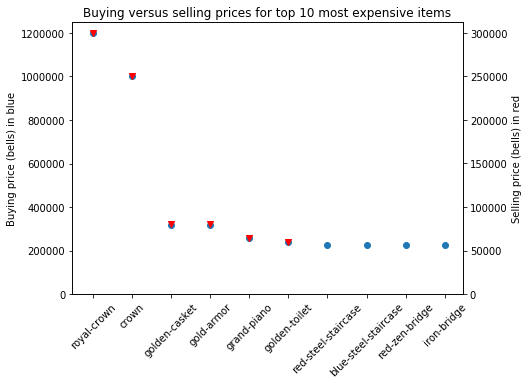

In [20]:
# create a new figure and axis
fig, buy_ax = plt.subplots(1, 1, figsize=(7, 5))

# create a twinned axis
sell_ax = buy_ax.twinx()

# create a scatter plot on the buy axis with unique marker 
buy_ax.scatter(sv["id"], sv["buy_value"], marker="o")

# set the minimum y-value plotted to be 0
buy_ax.set_ylim(0)

# set the axis' y label 
buy_ax.set_ylabel("Buying price (bells) in blue")

# sell axis with unique marker and colour
sell_ax.scatter(sv["id"], sv["sell_value"], color="red", marker="v")
sell_ax.set_ylim(0)
sell_ax.set_ylabel("Selling price (bells) in red")

# set all x-ticks rotation to be at 45 degrees
for tick in buy_ax.get_xticklabels():
    tick.set_rotation(45)
    
plt.title('Buying versus selling prices for top 10 most expensive items')

In [21]:
# find all the categories
cats = item_data["category"].unique()
item_data[(item_data["category"]=="Fossils")]["sell_value"].mean()

# create a new list for mean prices 
mean_prices = []

# this goes over all the items in cats and sets the variable i to be equal to each one in turn, then runs the code under the loop
for i in cats:
    
    # add a new item to the mean prices list with the mean sell_value from the currently selected category
    mean_prices.append(item_data[(item_data["category"]==i)]["sell_value"].mean())

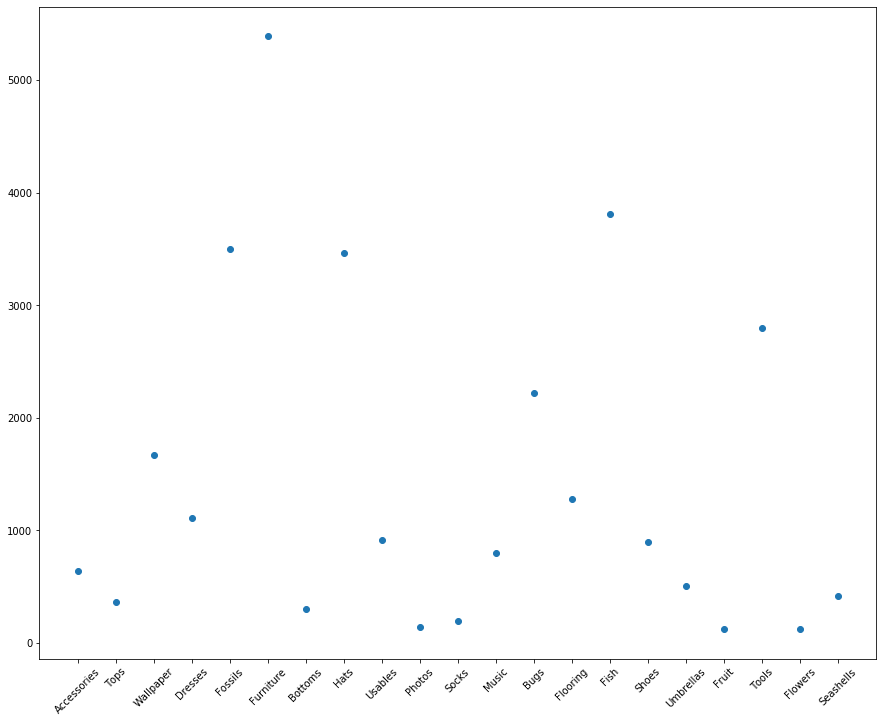

In [22]:
fig, ax = plt.subplots(figsize=(15, 12))
ax.scatter(cats, mean_prices)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [23]:
# Sentiment analysis of the data from the user reviews
from IPython.display import display
import matplotlib.pyplot as plt
import re
import nltk 

%matplotlib inline

In [24]:
user_reviews = pd.read_csv('user_reviews.csv', delimiter = ',')
user_reviews

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20
...,...,...,...,...
2994,1,TakezoShinmen,1 Island for console limitation.I cannot play ...,2020-05-03
2995,1,Pikey17,"Per giocare con figli o fidanzate, mogli o per...",2020-05-03
2996,0,Lemmeadem,One island per console is a pathetic limitatio...,2020-05-03
2997,2,TandemTester938,Even though it seems like a great game with ma...,2020-05-03


In [25]:
# customising the plot size
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


Text(0.5, 1.0, 'Percentage of Grades')

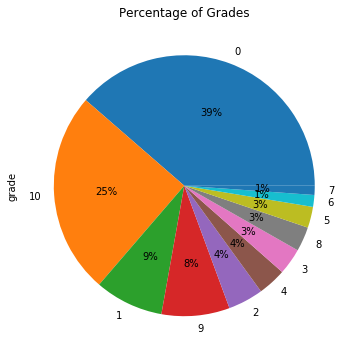

In [29]:
# Creating a pie chart of the various review scores found in the user reviews csv file
user_reviews.grade.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title("Percentage of Grades")

In [31]:
# importing the necessary tools to conduct sentiment analysis
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re

from shifterator import relative_shift as rs

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [32]:
user_reviews.head()

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20


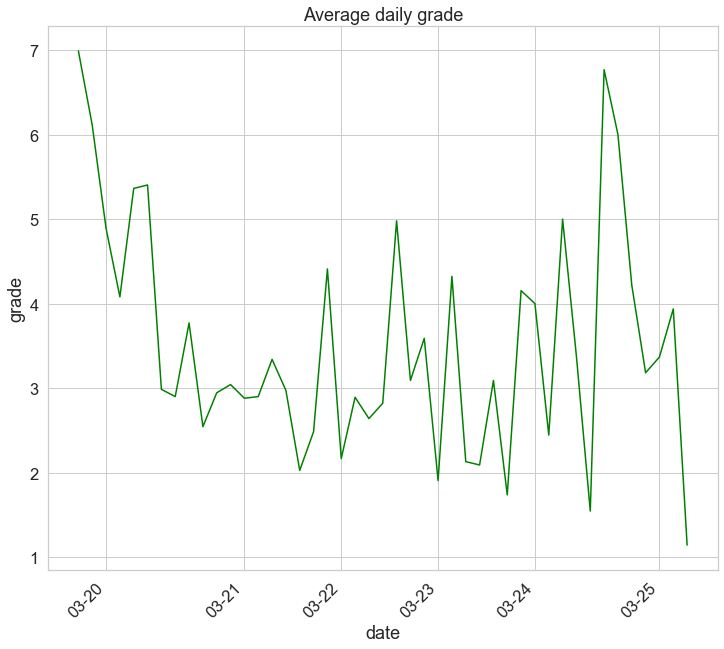

In [38]:
# creating a plot to show the average grade per day, as time goes on 
user_reviews['date'] = pd.to_datetime(user_reviews['date'])
user_reviews.index = user_reviews['date'] 

fig, ax = plt.subplots(figsize=(12, 10))

mean_daily_grades = user_reviews.resample('D', on='date').mean().reset_index('date')

# Plot horizontal bar graph
monthly_plot = sns.lineplot(data = mean_daily_grades,
                      x = 'date',
                      y = 'grade',
                      color="green"
                      )

ax.set_title("Average daily grade")
x_dates = mean_daily_grades['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

plt.show()

In [39]:
# Separating the reviews, based on the score, into positive and negative 
median_grade = user_reviews.grade.median()

user_reviews.loc[user_reviews['grade'] <= median_grade, 'review_category'] = 'Negative' 
user_reviews.loc[user_reviews['grade'] > median_grade, 'review_category'] = 'Positive' 

reviews_neg = user_reviews[user_reviews['review_category'] == 'Negative']
reviews_pos = user_reviews[user_reviews['review_category'] == 'Positive']

In [40]:
texts = user_reviews['text'].tolist()
texts_neg = reviews_neg['text'].tolist()
texts_pos = reviews_pos['text'].tolist()

In [41]:
# Removing stop words with nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/kate/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['has',
 'where',
 'both',
 "aren't",
 'other',
 'should',
 'me',
 'herself',
 'it',
 'was']

In [43]:
def remove_punctuation(txt):
    """Replace URLs and other punctuation found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with URLs and punctuation removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [44]:
def clean_text(txt):
    """Removes punctuation, changes to lowercase, removes
        stopwords, removes "animal" and "crossing", and
        calculates word frequencies.

    Parameters
    ----------
    txt : string
        A text string that you want to clean.

    Returns
    -------
    Words and frequencies
    """
    
    tmp = [remove_punctuation(t) for t in txt]
    tmp = [t.lower().split() for t in tmp]
    
    tmp = [[w for w in t if not w in stop_words]
              for t in tmp]
    tmp = [[w for w in t if not w in ['animal', 'crossing']]
                     for t in tmp]
    
    tmp = list(itertools.chain(*tmp))
    tmp = collections.Counter(tmp)
        
    return tmp

In [45]:
# Clean text reviews
clean_texts_neg = clean_text(texts_neg)
clean_texts_pos = clean_text(texts_pos)

In [60]:
# creating a wordcloud from the positive text reviews 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    ).generate(str(clean_texts_pos))

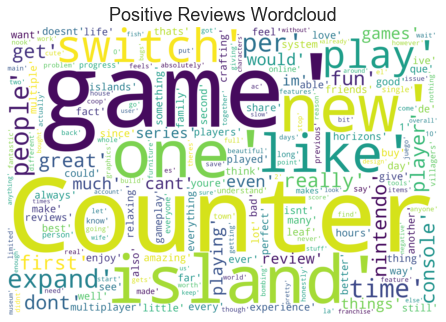

In [62]:
    figsize = (15, 15),
    facecolor = 'y',
    edgecolor = 'k'
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
# Name the plot
plt.title("Positive Reviews Wordcloud")
plt.show()

In [63]:
# To show the negative word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    ).generate(str(clean_texts_neg))

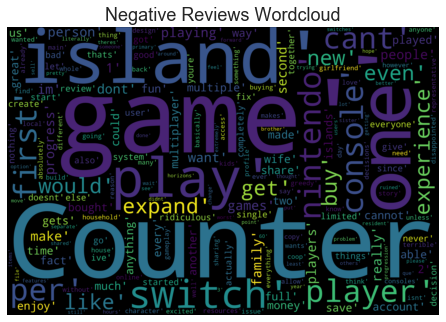

In [64]:
    figsize = (15, 15),
    facecolor = 'y',
    edgecolor = 'k'
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Negative Reviews Wordcloud")
plt.show()

In [65]:
# Data Visulation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [66]:
# Data Prediction Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
user_reviews

,grade,user_name,text,date,review_category
date,,,,,
2020-03-20,4,mds27272,My gf started playing before me. No option to ...,2020-03-20,Positive
2020-03-20,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,Positive
2020-03-20,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20,Negative
2020-03-20,0,Houndf,We need equal values and opportunities for all...,2020-03-20,Negative
2020-03-20,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20,Negative
...,...,...,...,...,...
2020-05-03,1,TakezoShinmen,1 Island for console limitation.I cannot play ...,2020-05-03,Negative
2020-05-03,1,Pikey17,"Per giocare con figli o fidanzate, mogli o per...",2020-05-03,Negative
2020-05-03,0,Lemmeadem,One island per console is a pathetic limitatio...,2020-05-03,Negative


In [68]:
# Data set info 
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2999 entries, 2020-03-20 to 2020-05-03
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   grade            2999 non-null   int64         
 1   user_name        2999 non-null   object        
 2   text             2999 non-null   object        
 3   date             2999 non-null   datetime64[ns]
 4   review_category  2999 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 140.6+ KB


In [69]:
# Dropping null rows
reviews = user_reviews.dropna()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2999 entries, 2020-03-20 to 2020-05-03
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   grade            2999 non-null   int64         
 1   user_name        2999 non-null   object        
 2   text             2999 non-null   object        
 3   date             2999 non-null   datetime64[ns]
 4   review_category  2999 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 140.6+ KB


In [70]:
reviews.head()

,grade,user_name,text,date,review_category
date,,,,,
2020-03-20,4,mds27272,My gf started playing before me. No option to ...,2020-03-20,Positive
2020-03-20,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,Positive
2020-03-20,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20,Negative
2020-03-20,0,Houndf,We need equal values and opportunities for all...,2020-03-20,Negative
2020-03-20,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20,Negative


In [71]:
# Length of words in each message of review text column 
reviews['Length of Words'] = reviews['text'].apply(lambda x : len(x.split()))
reviews.rename(columns={'grade':'rating'},inplace=True)  # renaming 'overall' column with 'rating' 
reviews.head(4)

,rating,user_name,text,date,review_category,Length of Words
date,,,,,,
2020-03-20,4,mds27272,My gf started playing before me. No option to ...,2020-03-20,Positive,70
2020-03-20,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,Positive,167
2020-03-20,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20,Negative,185
2020-03-20,0,Houndf,We need equal values and opportunities for all...,2020-03-20,Negative,56


In [72]:
# Total Number of Users who rated the product as per rating category
reviews.groupby(by='rating').rating.count()

rating
0     1158
1      255
2      131
3       98
4      105
5       78
6       44
7       34
8       91
9      253
10     752
Name: rating, dtype: int64

Text(0.5, 1, 'Rating with respect to length (in words) of review')

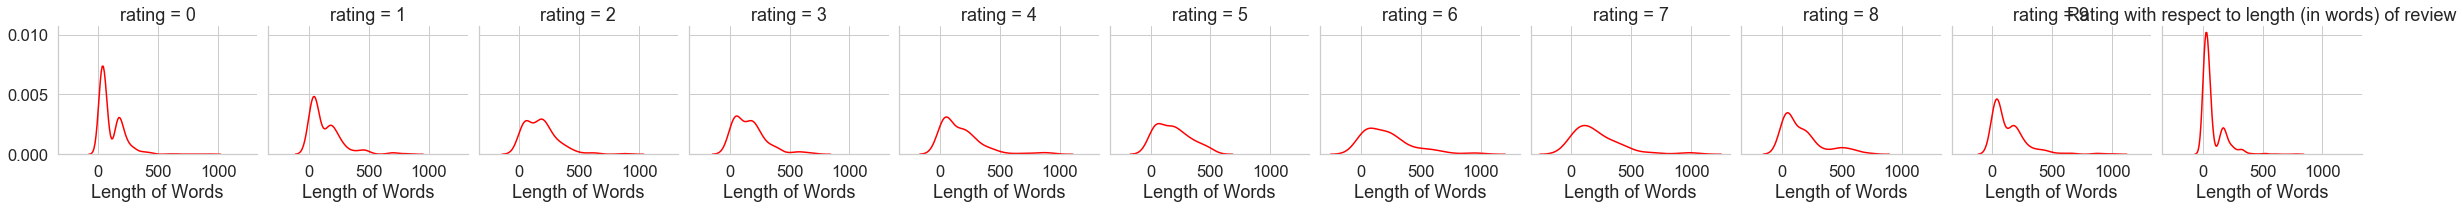

In [77]:
# Data visualisation - overall rating with respect to length of words in 'text' messages 
g = sns.FacetGrid(reviews,col='rating',sharex=True)
g.map(sns.kdeplot,'Length of Words',color='red')
plt.title("Rating with respect to length (in words) of review")

In [79]:
# Total number of people that rated the game as per rating category
go.Figure(data=[go.Pie(values=reviews.groupby(by='rating').rating.count(),labels=[0,1,2,3,4,5,6,7,8,9,10],
                       title='Volume of reviews per rating')])